# Football Match Outcome Prediction - Project
# Milestone 1: EDA and Data Cleaning

In [7]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


The football dataset I am working with includes the result of each game from the biggest leagues in the world since 1990.

First, it will be beneficial to explore the dataset and look for any unexpected and null values for each feature.

So let's load in the dataset for the 2020/21 English Premier League:

In [67]:
year = 2020
pl_results = pd.read_csv(f"Football-Dataset/premier_league/Results_{year}_premier_league.csv")
pl_results_initial = pd.read_csv(f"Football-Dataset/premier_league/Results_{year}_premier_league.csv")

pl_results

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Liverpool,Norwich City,4-1,https://www.besoccer.com/match/liverpool/norwi...,2020,1,premier_league
1,West Ham,Man. City,0-5,https://www.besoccer.com/match/west-ham-united...,2020,1,premier_league
2,AFC Bournemouth,Sheffield United,1-1,https://www.besoccer.com/match/afc-bournemouth...,2020,1,premier_league
3,Burnley,Southampton,3-0,https://www.besoccer.com/match/burnley-fc/sout...,2020,1,premier_league
4,Crystal Palace,Everton,0-0,https://www.besoccer.com/match/crystal-palace-...,2020,1,premier_league
...,...,...,...,...,...,...,...
375,Leicester,Man. Utd,0-2,https://www.besoccer.com/match/leicester-city-...,2020,38,premier_league
376,Man. City,Norwich City,5-0,https://www.besoccer.com/match/manchester-city...,2020,38,premier_league
377,Newcastle,Liverpool,1-3,https://www.besoccer.com/match/newcastle-unite...,2020,38,premier_league
378,Southampton,Sheffield United,3-1,https://www.besoccer.com/match/southampton-fc/...,2020,38,premier_league


## 1.1 The Full Football Dataset

### 1.1.1 Create dataframe for match data spanning all leagues and years

We have 7 different features here: (Home_Team, Away_Team, Result, Link, Season, Round, League).

Let's load in the entire dataset of every league and year at once and concatenate into a singular pandas dataframe.

In [52]:
leagues = ['ligue_1','championship','eerste_divisie','ligue_2','premier_league','eredivisie','primera_division','primeira_liga','segunda_division','segunda_liga','serie_b','bundesliga','serie_a','2_liga']

full_results_table = pd.DataFrame()

for league in leagues:
    for year in range(1990, 2022):
        results_table = pd.read_csv(f"Football-Dataset/{league}/Results_{year}_{league}.csv")
        full_results_table = pd.concat([full_results_table, results_table], ignore_index=True)

full_results_table

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,1,ligue_1
1,Montpellier,Cannes,4-1,https://www.besoccer.com/match/montpellier-hsc...,1990,1,ligue_1
2,Toulouse,FC Mulhouse,3-0,https://www.besoccer.com/match/toulouse-fc/mul...,1990,1,ligue_1
3,Sporting Toulon Var,Saint-Étienne,2-0,https://www.besoccer.com/match/sporting-toulon...,1990,1,ligue_1
4,Nantes,Auxerre,2-1,https://www.besoccer.com/match/nantes/auxerre/...,1990,1,ligue_1
...,...,...,...,...,...,...,...
146493,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga
146494,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga
146495,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga
146496,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga


### 1.1.2 Check for any null values

In [209]:
full_results_table.isnull().sum().sort_values(ascending=False) 

Home_Team    0
Away_Team    0
Result       0
Link         0
Season       0
Round        0
League       0
dtype: int64

### 1.1.3 Clean Home_Team and Away_Team columns

Let's check if the Home_Team and Away_Team columns are valid. If we take the unique values in the Home_Team column and Away_Team column we expect both of these for any given season to contain the same teams. 

In [32]:
# For each league and year, check if all teams play Home and Away

leagues = ['ligue_1','championship','eerste_divisie','ligue_2','premier_league','eredivisie','primera_division','primeira_liga','segunda_division','segunda_liga','serie_b','bundesliga','serie_a','2_liga']

errors = []

for league in leagues:
    for year in range(1990, 2022):
        x = full_results_table.loc[(full_results_table['League'] == league) & (full_results_table['Season'] == year)]

        # if the unique Home_Teams and Away Teams are the same (sorted() function ensures they will be in same order) continue otherwise add to errors list
        if sorted(x['Home_Team'].unique()) == sorted(x['Away_Team'].unique()):
            continue
        else:
            #print('Error for', year, league)
            errors.append(f'{year} {league}')
            continue

# Output all errant leagues and seasons in list
errors



['1990 ligue_1',
 '1997 eerste_divisie',
 '1998 eerste_divisie',
 '1999 eerste_divisie',
 '2000 eerste_divisie',
 '2001 eerste_divisie',
 '2002 eerste_divisie',
 '2003 eerste_divisie',
 '2004 eerste_divisie',
 '2005 eerste_divisie',
 '2006 eerste_divisie',
 '2007 eerste_divisie',
 '2008 eerste_divisie',
 '2009 eerste_divisie',
 '2010 eerste_divisie',
 '2011 eerste_divisie',
 '2012 eerste_divisie',
 '2013 eerste_divisie',
 '2014 eerste_divisie',
 '2020 eerste_divisie',
 '2021 eerste_divisie',
 '1998 segunda_liga',
 '1999 segunda_liga',
 '2000 segunda_liga',
 '2001 segunda_liga',
 '2002 segunda_liga',
 '2003 segunda_liga',
 '2004 segunda_liga',
 '2005 segunda_liga',
 '2006 segunda_liga',
 '2007 segunda_liga',
 '2008 segunda_liga',
 '2009 segunda_liga',
 '2010 segunda_liga',
 '2011 segunda_liga',
 '2012 segunda_liga',
 '2013 segunda_liga',
 '2014 segunda_liga',
 '2015 segunda_liga',
 '2016 segunda_liga',
 '2017 segunda_liga',
 '2018 segunda_liga',
 '2019 segunda_liga',
 '2020 segunda_liga

Eerste Divisi eand Segunda liga contain the most errors here, and Ligue 1 flags up for just the 1990 season.

Let's investigate this further: 

In [33]:
full_results_table

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,1,ligue_1
1,Montpellier,Cannes,4-1,https://www.besoccer.com/match/montpellier-hsc...,1990,1,ligue_1
2,Toulouse,FC Mulhouse,3-0,https://www.besoccer.com/match/toulouse-fc/mul...,1990,1,ligue_1
3,Sporting Toulon Var,Saint-Étienne,2-0,https://www.besoccer.com/match/sporting-toulon...,1990,1,ligue_1
4,Nantes,Auxerre,2-1,https://www.besoccer.com/match/nantes/auxerre/...,1990,1,ligue_1
...,...,...,...,...,...,...,...
146493,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga
146494,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga
146495,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga
146496,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga


In [212]:
x = full_results_table.loc[(full_results_table['League'] == 'ligue_1') & (full_results_table['Season'] == 1990)]

x

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,1,ligue_1
1,Montpellier,Cannes,4-1,https://www.besoccer.com/match/montpellier-hsc...,1990,1,ligue_1
2,Toulouse,FC Mulhouse,3-0,https://www.besoccer.com/match/toulouse-fc/mul...,1990,1,ligue_1
3,Sporting Toulon Var,Saint-Étienne,2-0,https://www.besoccer.com/match/sporting-toulon...,1990,1,ligue_1
4,Nantes,Auxerre,2-1,https://www.besoccer.com/match/nantes/auxerre/...,1990,1,ligue_1
...,...,...,...,...,...,...,...
375,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,38,ligue_1
376,Sochaux,Stade Brestois,1-0,https://www.besoccer.com/match/sochaux/stade-b...,1990,38,ligue_1
377,Nice,PSG,3-3,https://www.besoccer.com/match/nice/paris-sain...,1990,38,ligue_1
378,Metz,Girondins Bordeaux,0-0,https://www.besoccer.com/match/metz/bordeaux/1...,1990,38,ligue_1


In [133]:
x.loc[(x['Home_Team'] == 'Lille') & ((x['Away_Team'] == 'Caen'))]

,Home_Team,Away_Team,Result,Link,Season,Round,League,Home_Goals,Away_Goals,Label
5,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,1,ligue_1,1,0,1
15,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,2,ligue_1,1,0,1
25,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,3,ligue_1,1,0,1
35,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,4,ligue_1,1,0,1
45,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,5,ligue_1,1,0,1
55,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,6,ligue_1,1,0,1
65,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,7,ligue_1,1,0,1
75,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,8,ligue_1,1,0,1
85,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,9,ligue_1,1,0,1
95,Lille,Caen,1-0,https://www.besoccer.com/match/lillestrom/caen...,1990,10,ligue_1,1,0,1


It seems this dataset has been incorrectly scraped. Each round contains the exact same matchset. This is an error with how the data was scraped. At this point it is best to just remove all errant seasons and continue with a smaller dataset. We can possibly build a revised scraper later which will output the correct data. 



NOTE: I HAVE CHECKED ALL OF THE OTHER ERRANT SEASONS AND ALL FOLLOW THE SAME PATTERN OF DUPLICATED MATCHSET FOR EACH ROUND



Fortunately, this only heavily impacts the Segunda and Eerste Divisie leagues, thus we can continue.

Let's remove all of the errant seasons:

In [34]:
# Remove all rows corresponding with errant seasons

for i in errors:
    season, league = i.split(' ')
    full_results_table = full_results_table.loc[(full_results_table['League'] != league) | (full_results_table['Season'] != int(season))]



In [35]:
full_results_table

,Home_Team,Away_Team,Result,Link,Season,Round,League
380,Cannes,Montpellier,2-1,https://www.besoccer.com/match/as-cannes/montp...,1991,1,ligue_1
381,PSG,Nancy,2-1,https://www.besoccer.com/match/paris-saint-ger...,1991,1,ligue_1
382,Olympique Marseille,Nice,1-0,https://www.besoccer.com/match/olympique-marse...,1991,1,ligue_1
383,Metz,Lille,2-2,https://www.besoccer.com/match/metz/lillestrom...,1991,1,ligue_1
384,Sochaux,Stade Brestois,1-1,https://www.besoccer.com/match/sochaux/stade-b...,1991,1,ligue_1
...,...,...,...,...,...,...,...
146493,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga
146494,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga
146495,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga
146496,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga


### 1.1.4 Clean Result column

Result column expected to be in '0-0' string format where first integer is Home Team Goals and last integer is Away Team Goals.

Let's check for any unexpected values in Result column:

In [7]:
full_results_table['Result'].unique()

array(['2-1', '1-0', '2-2', '1-1', '0-0', '0-2', '0-1', '2-0', '3-0',
       '3-1', '0-3', '4-0', '1-2', '5-0', '4-1', '3-2', '1-3', '2-3',
       '3-3', '5-2', '4-2', '6-1', '7-0', '6-0', '5-1', '1-4', '6-2',
       '4-3', '0-4', '2-5', '2-6', '2-4', '4-5', '1-5', '3-4', '6-3',
       '0-5', '5-3', '8-0', '5-4', '4-4', '1-6', '8-1', '0-6', '5-5',
       '2-7', '3-5', '0-9', '0-7', '7-1', '9-0', '18 MAR', '7-2', '4-6',
       '3-6', '1-7', '6-5', '4-7', '6-4', '7-3', '5-6', '1-8', '7-4',
       '9-1', '8-2', '17 JAN', '9-2', '6-6', '10-0', '0 (0-0) 0', '0-8',
       '0-13', '2-8', '3-8', '10-2', '1 (0-0) 1', '3 (3-2) 2',
       '0 (0-1) 1', '3-7', '1-9', '7-6'], dtype=object)

Can see multiple unexpected values for Result which will cause problems in later stages if not corrected now. Automating the correct values in will be needlessly complicated and removing these rows altogether will also cause further problems. Thus, the best choice now is to manually change all of these to their correct values. There is not too many so this will not take too long.

NOTE: THIS DOES NOT TAKE INTO ACCOUNT THAT SOME RESULTS MAY BE WRONG EVEN IF CORRECTLY FORMATTED. FOR THIS PROJECT I WILL ASSUME THAT ALL GIVEN RESULT VALUES ARE CORRECT.

In [36]:
# From above cell, all errant Result values had len>4. Can use a quick expression to display all of these at once.
full_results_table[full_results_table["Result"].str.len()>4]

,Home_Team,Away_Team,Result,Link,Season,Round,League
11309,Strasbourg,PSG,18 MAR,https://www.besoccer.com/match/strasbourg/pari...,2020,28,ligue_1
50718,Aston Villa,Everton,17 JAN,https://www.besoccer.com/match/aston-villa-fc/...,2021,19,premier_league
58006,PEC Zwolle,VVV Venlo,0 (0-0) 0,https://www.besoccer.com/match/fc-zwolle/vvv/2013,2013,15,eredivisie
79497,Marítimo,Sporting CP,1 (0-0) 1,https://www.besoccer.com/match/maritimo/sporti...,2013,3,primeira_liga
113666,Spezia,SSC Bari,3 (3-2) 2,https://www.besoccer.com/match/asd-spezia/as-b...,2013,18,serie_b
113668,Cittadella,Varese,0 (0-1) 1,https://www.besoccer.com/match/as-cittadella/a...,2013,18,serie_b


In [37]:
# After researching this game (https://www.besoccer.com/match/strasbourg/paris-saint-germain-fc/202010330/table)
# it turns out this match was cancelled due to the coronavirus pandemic. In fact the rest of this 2019/20 ligue 1 season was cancelled
# after just 28 rounds. Strasbourg and PSG are the only teams that season to only play 27 games where the rest played 28.

# REMOVE RECORD

full_results_table.loc[full_results_table['Result'] == '18 MAR']
full_results_table = full_results_table.loc[full_results_table['Result'] != '18 MAR']


In [38]:
# (https://www.besoccer.com/match/aston-villa-fc/everton-fc/202172414)

# CHANGE TO 0-0

full_results_table.loc[full_results_table['Result'] == '17 JAN']
full_results_table["Result"].loc[full_results_table['Result'] == '17 JAN'] = '0-0'



/home/arman/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
# https://www.besoccer.com/match/fc-zwolle/vvv/20136495

# CHANGE TO 0-0

full_results_table.loc[full_results_table['Result'] == '0 (0-0) 0']
full_results_table["Result"].loc[full_results_table['Result'] == '0 (0-0) 0'] = '0-0'

In [40]:
# https://www.besoccer.com/match/maritimo/sporting-lisbon/20139929

# CHANGE TO 1-1

full_results_table.loc[full_results_table['Result'] == '1 (0-0) 1']
full_results_table["Result"].loc[full_results_table['Result'] == '1 (0-0) 1'] = '1-1'
  
  

In [41]:
# https://www.besoccer.com/match/asd-spezia/as-bari/2013228635

# CHANGE TO 3-2

full_results_table.loc[full_results_table['Result'] == '3 (3-2) 2']
full_results_table["Result"].loc[full_results_table['Result'] == '3 (3-2) 2'] = '3-2'


In [42]:
# https://www.besoccer.com/match/as-cittadella/as-varese-1910/2013228628

# CHANGE TO 0-1

full_results_table.loc[full_results_table['Result'] == '0 (0-1) 1']
full_results_table["Result"].loc[full_results_table['Result'] == '0 (0-1) 1'] = '0-1'

## 1.2 Create new columns for Home and Away Goals / Label

Since the Result column is in string format it is rather difficult to directly compare the number of goals of each time and also a clear match outcome. Thus, I will create three new features which will split either side of the '-' for Home and Away goals for each match, and from this the overall match outcome (Win, Loss, Draw).

In [8]:
def home_away_goals(results_table):
    '''
    Adds Home_Goals and Away_Goals columns to dataframe. Uses the Results column and inputs 
    values for number of home goals and away goals for each match for given results_table. 

    Args
    ----------
    results_table: pandas.core.frame.DataFrame
        Dataframe of match results containing the Home_Team, Away_Team, Result, Link, Season,
        Round, League (and more).

    Returns
    -------
    results_table: pandas.core.frame.DataFrame
        Input results_table with additional columns stating the number of Home and Away goals.
    '''

    home_result = []
    away_result = []

    # iterate through each value in Result column and splits into home and away goals
    for results in results_table["Result"]:
        home_result.append(int(results[:results.find('-')]))
        away_result.append(int(results[results.find('-')+1:]))

    # create new columns Home_Goals and Away_Goals
    results_table["Home_Goals"] = home_result
    results_table["Away_Goals"] = away_result

    return results_table

def win_loss_draw(results_table):
    '''
    Adds Label column to results_table which dictates if match result was Home Win, Away Win
    or a Draw.

    *IMPORTANT* Requires Home_Goals and Away_Goals columns in input results_table which can be 
    generated using the home_away_goals function. (This function will automatically run the home_away_goals 
    function on input results_table if Home_Goals and Away_Goals columns not found).
    Args

    Args
    ----------
    results_table: pandas.core.frame.DataFrame
        Dataframe of match results containing the Home_Team, Away_Team, Result, Link, Season,
        Round, League (and more).

    Returns
    -------
    results_table: pandas.core.frame.DataFrame
        Input results_table with additional columns stating the number of Home and Away goals.
    '''

    # if Home_Goals and Away_Goals columns are not in the results_table, generate them here
    if "Home_Goals" and "Away_Goals" not in results_table:
        home_away_goals(results_table)

    #define conditions for win or loss
    conditions = [results_table["Home_Goals"] > results_table["Away_Goals"], 
                results_table["Home_Goals"] < results_table["Away_Goals"]]

    # define choices : 1-Home Win, -1-Away Win, 0-Draw
    choices = [1, -1]

    #create new column in DataFrame that displays results of comparisons
    results_table["Label"] = np.select(conditions, choices, default=0)

    return results_table
    

In [9]:
full_results_table = win_loss_draw(full_results_table)

full_results_table

,Home_Team,Away_Team,Result,Link,Season,Round,League,Home_Goals,Away_Goals,Label
0,Cannes,Montpellier,2-1,https://www.besoccer.com/match/as-cannes/montp...,1991,1,ligue_1,2,1,1
1,PSG,Nancy,2-1,https://www.besoccer.com/match/paris-saint-ger...,1991,1,ligue_1,2,1,1
2,Olympique Marseille,Nice,1-0,https://www.besoccer.com/match/olympique-marse...,1991,1,ligue_1,1,0,1
3,Metz,Lille,2-2,https://www.besoccer.com/match/metz/lillestrom...,1991,1,ligue_1,2,2,0
4,Sochaux,Stade Brestois,1-1,https://www.besoccer.com/match/sochaux/stade-b...,1991,1,ligue_1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
131688,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga,1,3,-1
131689,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga,3,0,1
131690,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga,1,3,-1
131691,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga,0,4,-1


## 1.3 Data Visualisation Plots [TBF]

In [10]:
full_results_table

,Home_Team,Away_Team,Result,Link,Season,Round,League,Home_Goals,Away_Goals,Label
0,Cannes,Montpellier,2-1,https://www.besoccer.com/match/as-cannes/montp...,1991,1,ligue_1,2,1,1
1,PSG,Nancy,2-1,https://www.besoccer.com/match/paris-saint-ger...,1991,1,ligue_1,2,1,1
2,Olympique Marseille,Nice,1-0,https://www.besoccer.com/match/olympique-marse...,1991,1,ligue_1,1,0,1
3,Metz,Lille,2-2,https://www.besoccer.com/match/metz/lillestrom...,1991,1,ligue_1,2,2,0
4,Sochaux,Stade Brestois,1-1,https://www.besoccer.com/match/sochaux/stade-b...,1991,1,ligue_1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
131688,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga,1,3,-1
131689,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga,3,0,1
131690,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga,1,3,-1
131691,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga,0,4,-1


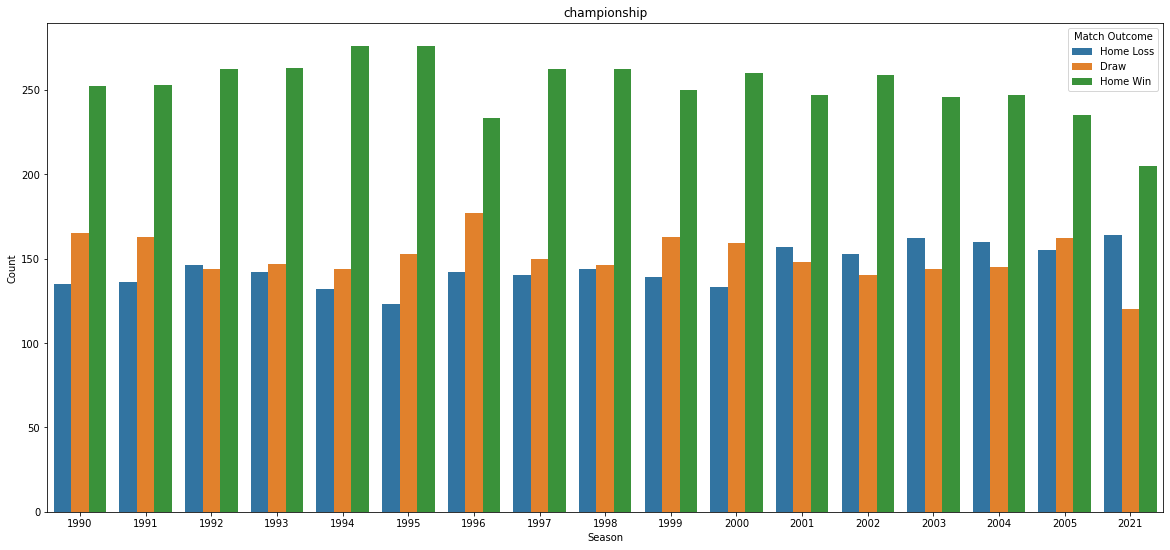

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot of match outcomes per season for each league
leagues = ['ligue_1','championship','eerste_divisie','ligue_2','premier_league','eredivisie','primera_division','primeira_liga','segunda_division','segunda_liga','serie_b','bundesliga','serie_a','2_liga']

league='championship'

plt.figure(figsize=(20,9))
plt.title(league)

league_plot = sns.countplot(x='Season', data=full_results_table.loc[(full_results_table['League'] == league)], hue='Label')

league_plot.set(xlabel='Season', ylabel='Count')
plt.legend(title='Match Outcome', labels=['Home Loss', 'Draw', 'Home Win'])


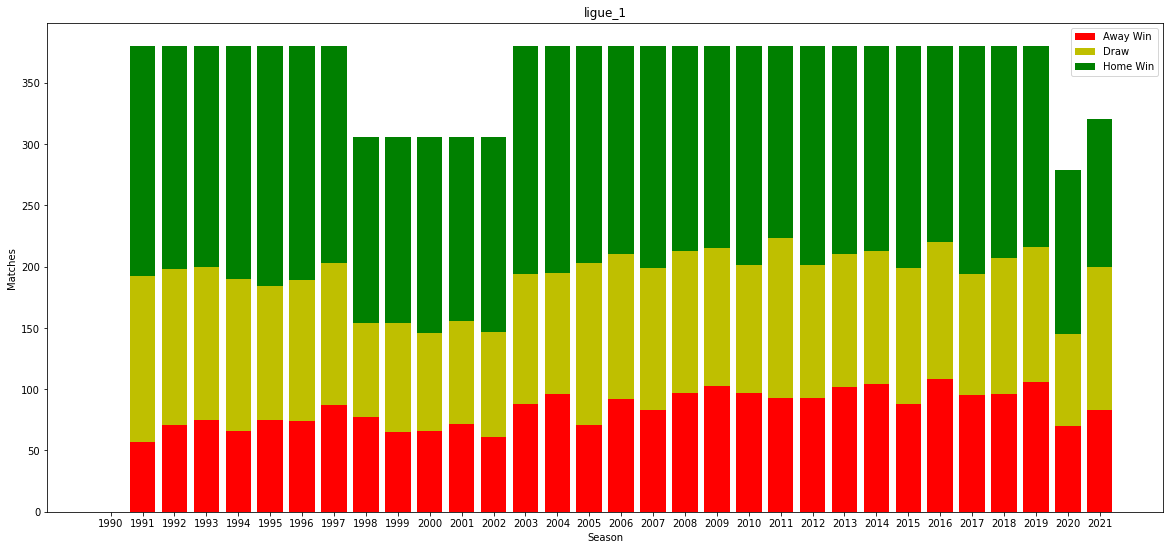

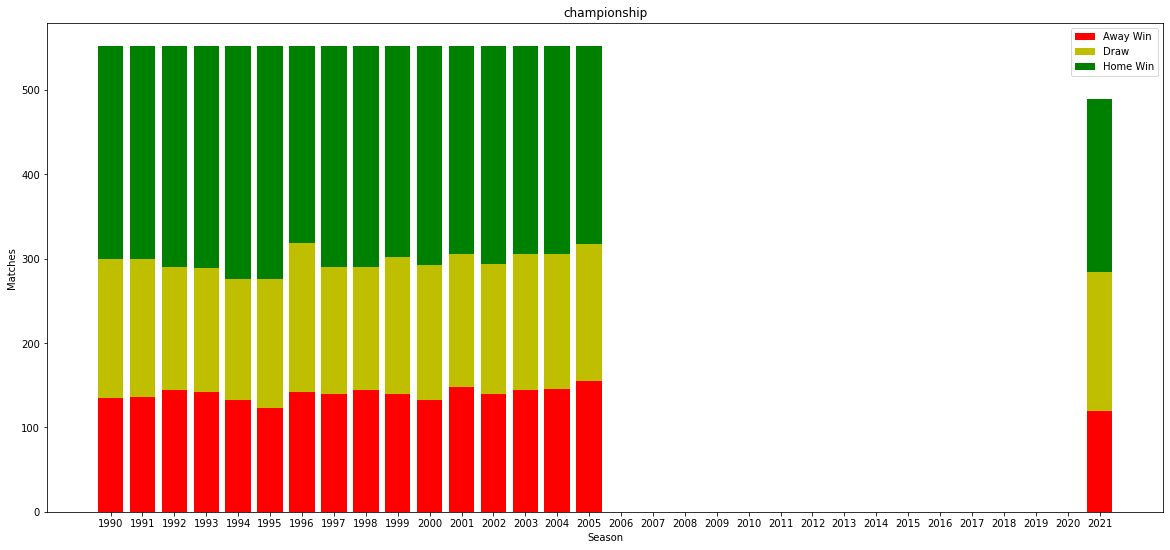

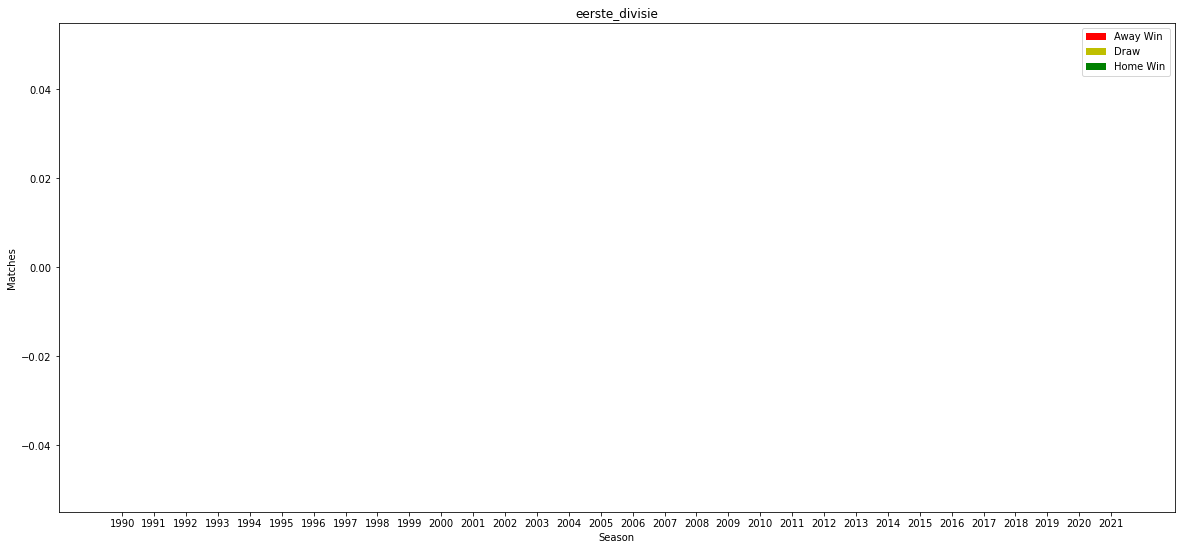

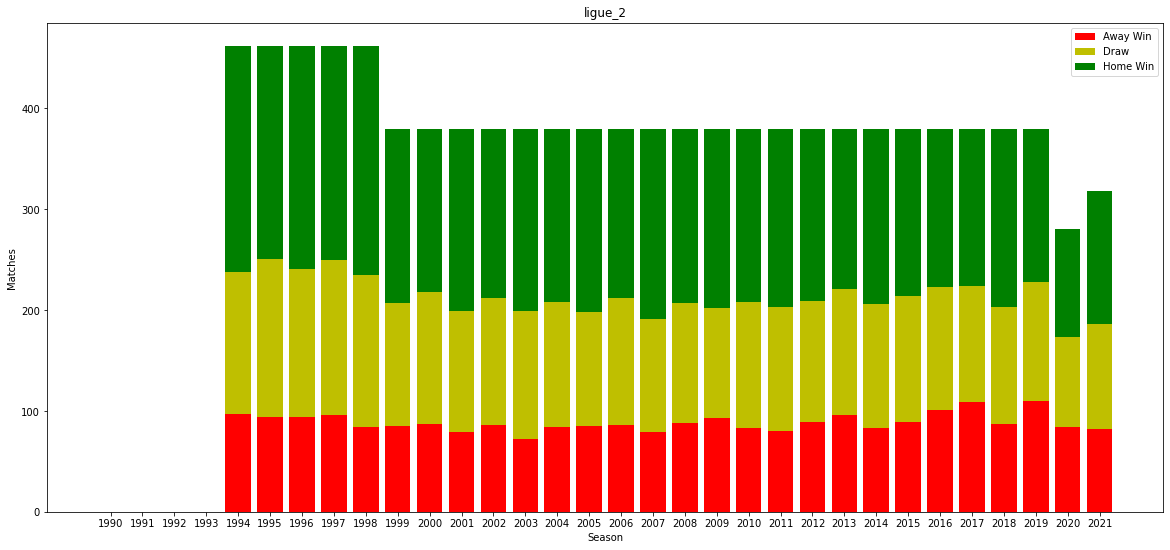

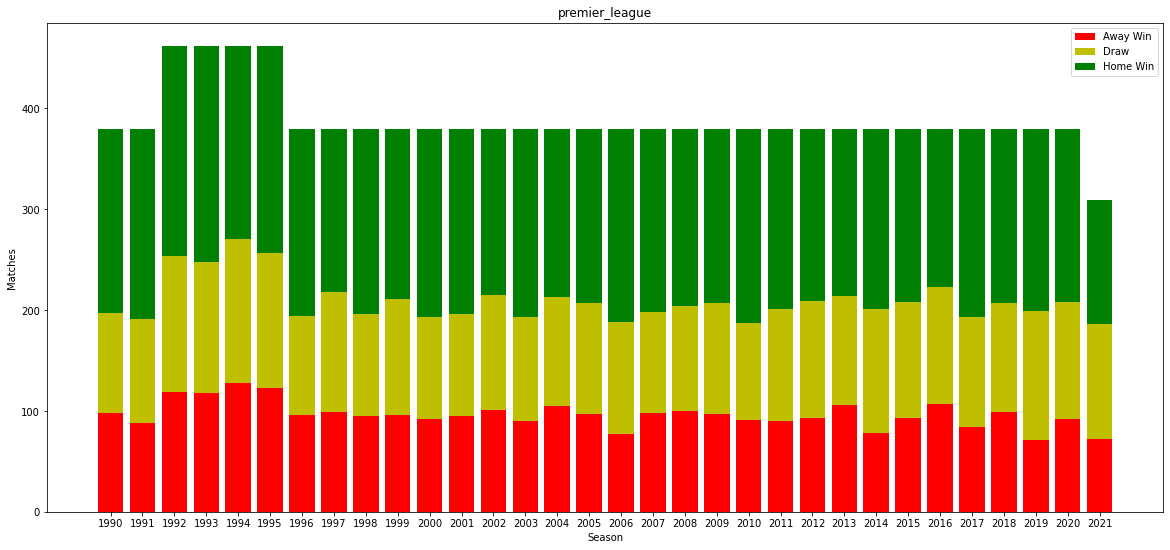

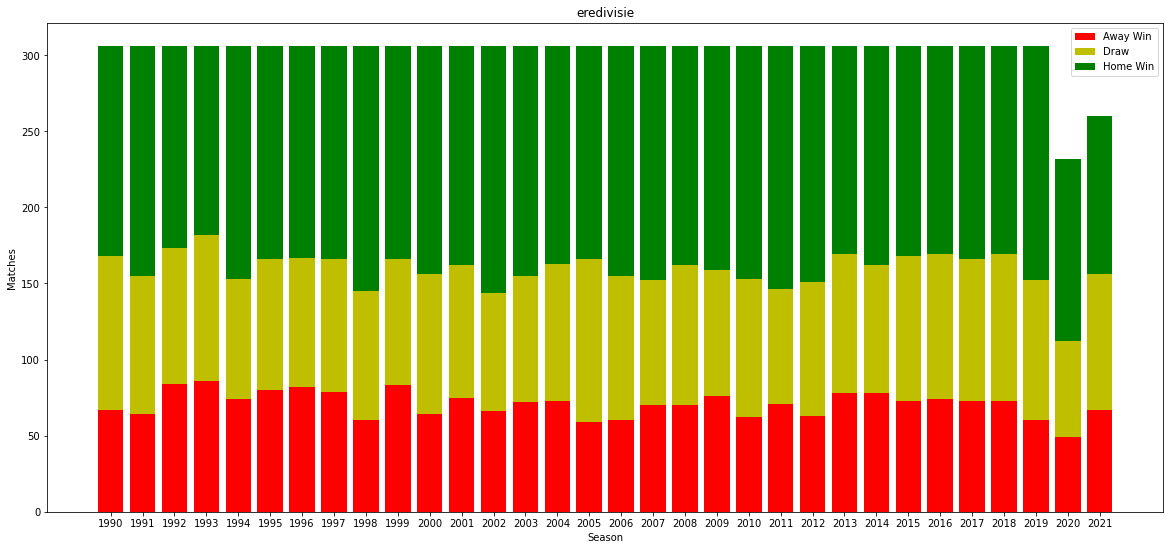

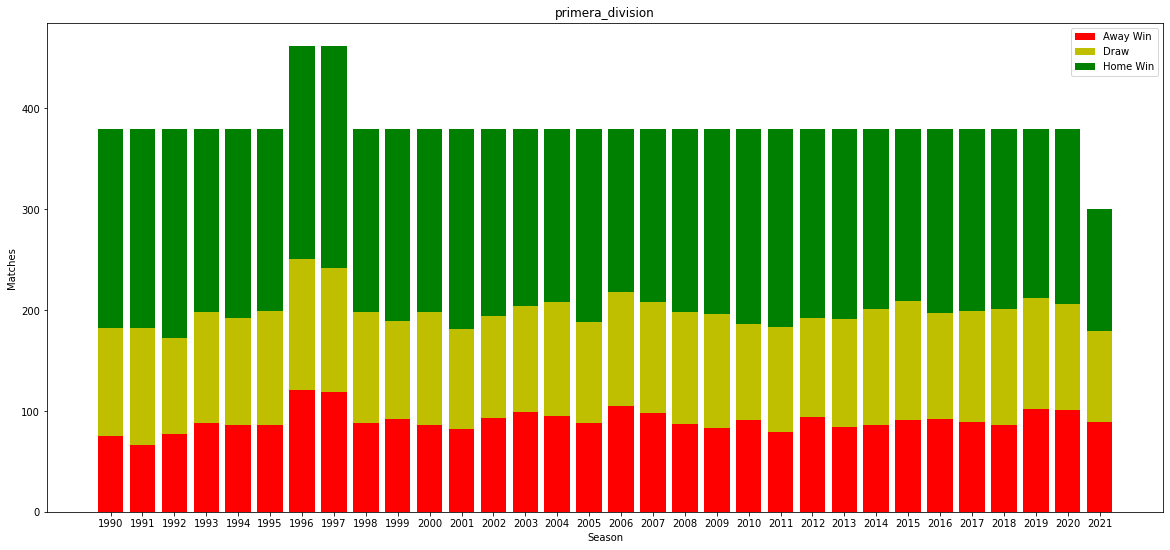

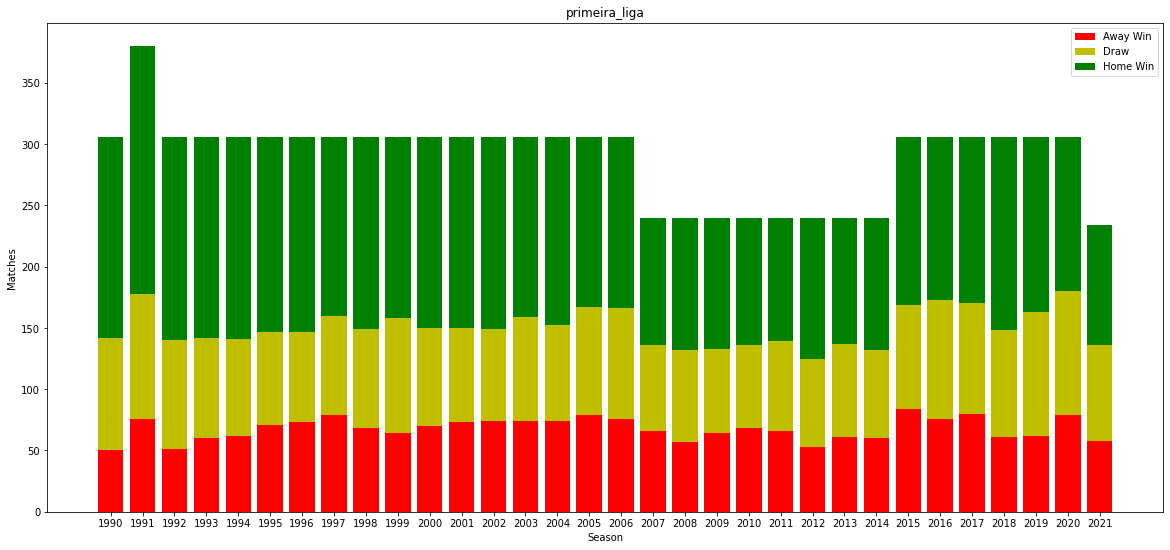

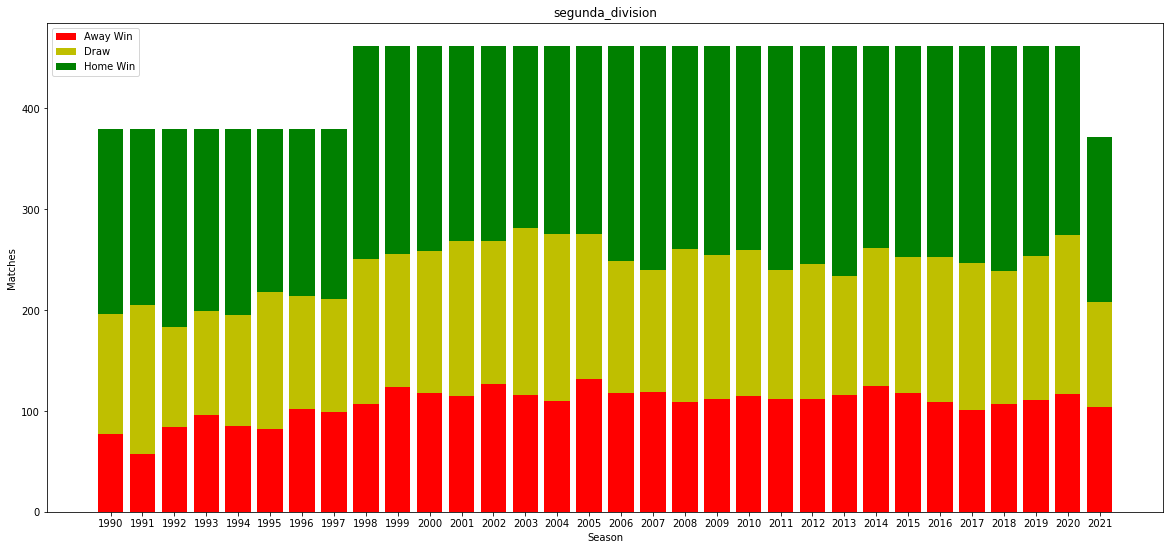

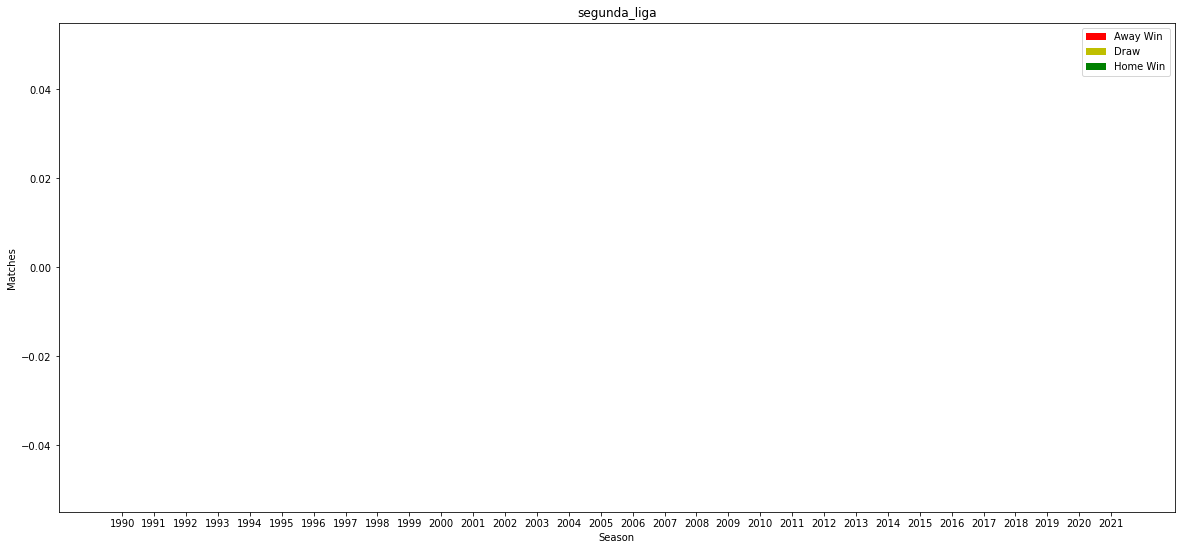

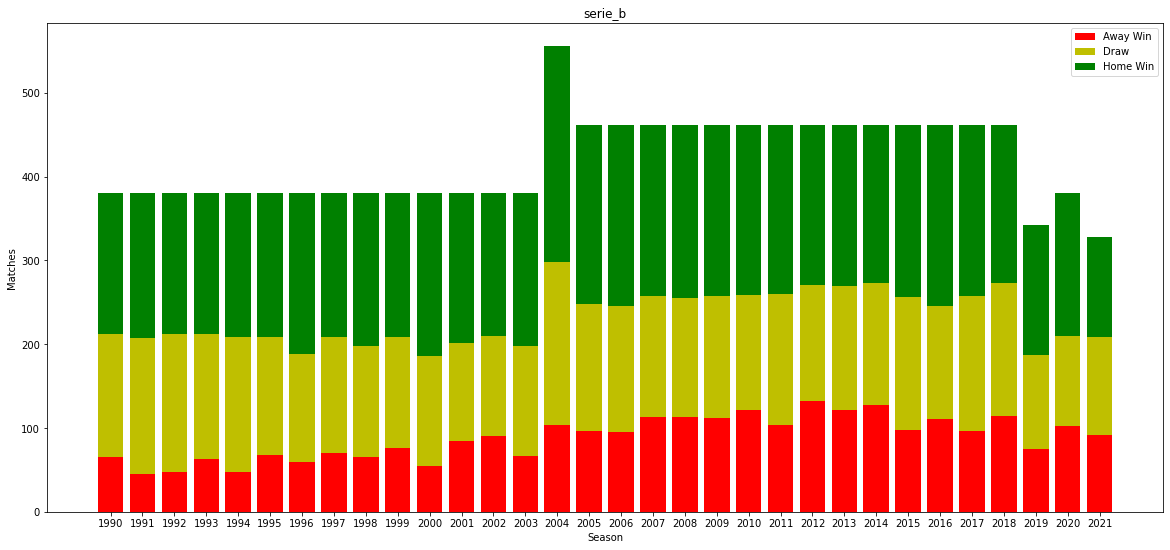

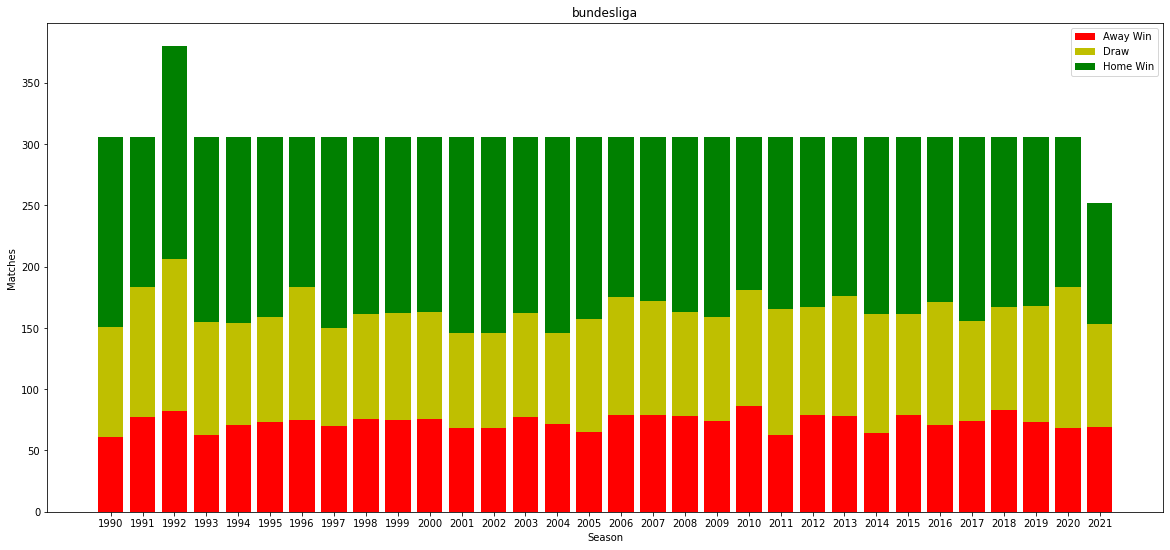

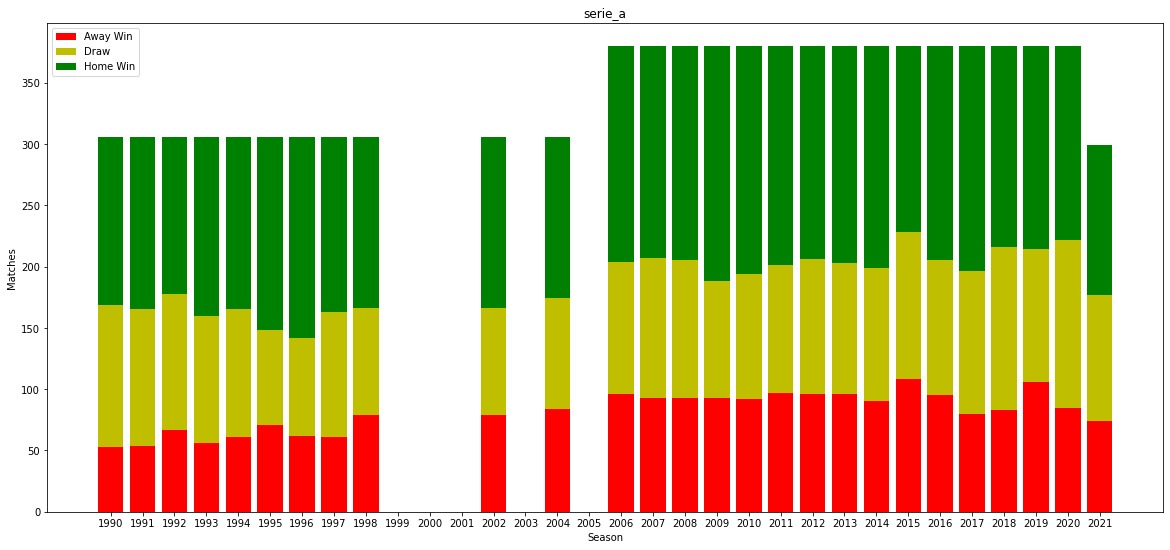

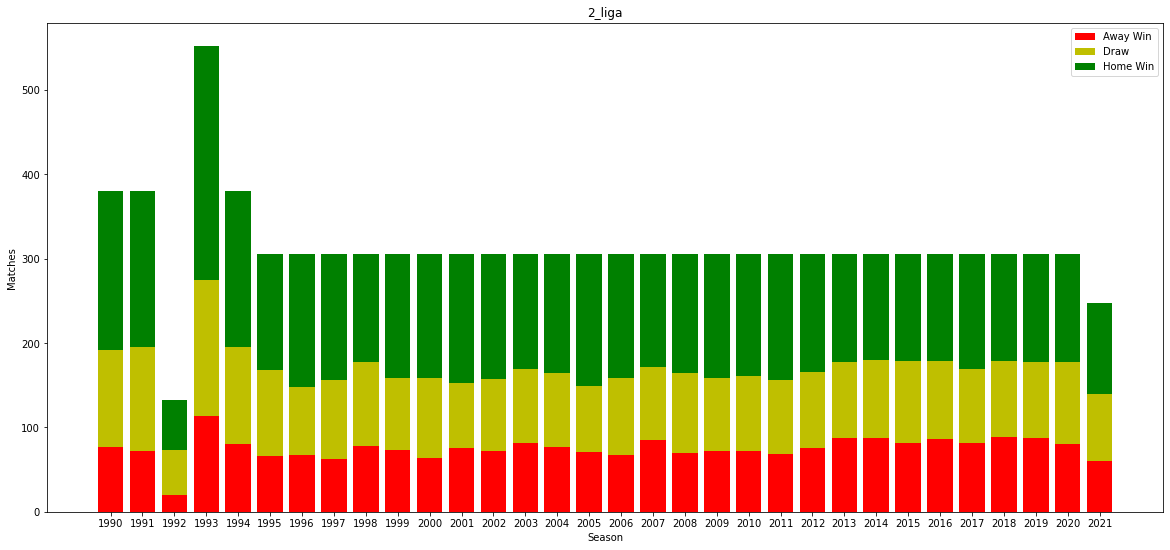

In [101]:
leagues = ['ligue_1','championship','eerste_divisie','ligue_2','premier_league','eredivisie','primera_division','primeira_liga','segunda_division','segunda_liga','serie_b','bundesliga','serie_a','2_liga']

for league in leagues:
    y1 = []
    y2 = []
    y3 = []
    x = []
    for year in range(1990, 2022):
        outcomes = list(full_results_table["Label"].loc[(full_results_table['League'] == league) & (full_results_table['Season'] == year)].value_counts())
        
        try:
            y1.append(outcomes[0])
            y2.append(outcomes[1])
            y3.append(outcomes[2])

        except:
            y1.append(0)
            y2.append(0)
            y3.append(0)

        x.append(str(year))
    
        

    wins = np.array(y1)
    draws = np.array(y2)
    losses = np.array(y3)

    # plot bars in stack manner
    plt.figure(figsize=(20,9))
    plt.bar(x, losses, color='r')
    plt.bar(x, draws, bottom=losses, color='y')
    plt.bar(x, wins, bottom=losses+draws, color='g')



    plt.title(league)
    plt.xlabel("Season")
    plt.ylabel("Matches")
    plt.legend(["Away Win", "Draw", "Home Win"])
    plt.show()

## 1.4 Merging with other datasets [TBF]

In [48]:
full_results_table

,Home_Team,Away_Team,Result,Link,Season,Round,League
380,Cannes,Montpellier,2-1,https://www.besoccer.com/match/as-cannes/montp...,1991,1,ligue_1
381,PSG,Nancy,2-1,https://www.besoccer.com/match/paris-saint-ger...,1991,1,ligue_1
382,Olympique Marseille,Nice,1-0,https://www.besoccer.com/match/olympique-marse...,1991,1,ligue_1
383,Metz,Lille,2-2,https://www.besoccer.com/match/metz/lillestrom...,1991,1,ligue_1
384,Sochaux,Stade Brestois,1-1,https://www.besoccer.com/match/sochaux/stade-b...,1991,1,ligue_1
...,...,...,...,...,...,...,...
146493,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga
146494,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga
146495,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga
146496,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga


### 1.4.1 Add Team Elo

In [ ]:
# Convert elo_list_raw dictionary into pandas dataframe (transposed)
elo_list = pd.DataFrame.from_dict(pickle.load(open('datasets/elo_dict.pkl', 'rb'))).T.reset_index()


def add_elo(results_table, elo_list):
    '''
    Adds Elo_home and Elo_away columns to dataframe for each match for given results_table.

    Args
    ----------
    results_table: pandas.core.frame.DataFrame
        Dataframe of match results containing the Home_Team, Away_Team, Result, Link, Season,
        Round and League.

    Returns
    -------
    results_table_elo: pandas.core.frame.DataFrame
        Merges input results_table dataframe with global dataframe elo_list, which contains 
        values for Elo_home and Elo_away for each match. Uses equivalent values in Link
        and index columns to merge dataframes.
    '''
    results_table_elo = pd.merge(results_table, elo_list, left_on="Link", right_on="index").drop("index", axis=1) # .drop index column as duplicate values with link column
    return results_table_elo

full_results_table = add_elo(full_results_table, elo_list=elo_list)

full_results_table

### 1.4.2 Match_info [TBF]

We have an extra dataset which contains more match data which can possibly help when training models and boost accuracy. 

Features include: Match data, the referee, and the number of yellow and red cards for each team

In [5]:
match_info = pd.read_csv("datasets/Match_Info.csv")

match_info

,Link,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red
0,/match/saarbrucken/stuttgarter-kickers/1990,"Saturday, 29 July 1989, 15:00",\r\nReferee: Hans-Jürgen Weber\r\n,0.0,0.0,3.0,0.0
1,/match/sc-freiburg/unterhaching/1990,"Saturday, 29 July 1989, 15:00",\r\nReferee: Kurt Wittke\r\n,1.0,0.0,0.0,0.0
2,/match/vfl-osnabruck/meppen/1990,"Saturday, 29 July 1989, 15:00",\r\nReferee: Werner Föckler\r\n,3.0,0.0,2.0,0.0
3,/match/rot-weiss-essen/schalke-04/1990,"Saturday, 29 July 1989, 15:00",\r\nReferee: Heinz Werner\r\n,2.0,0.0,2.0,0.0
4,/match/alemannia-aachen/msv-duisburg/1990,"Saturday, 29 July 1989, 15:00",\r\nReferee: Hans-Peter Dellwing\r\n,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
143343,/match/sunderland-afc/oxford-city/1999,"Saturday, 19 September 1998, 00:00",\r\nReferee: Anthony Leake\r\n,1.0,0.0,0.0,0.0
143344,/match/fc-gueugnon/bastia/1994,"Tuesday, 17 May 1994, 00:00",\r\nReferee: Jacques Poulain\r\n,0.0,0.0,0.0,0.0
143345,/match/tranmere-rovers/wolverhampton/1999,"Friday, 08 January 1999, 00:00",\r\nReferee: Kevin Lynch\r\n,2.0,0.0,1.0,0.0
143346,/match/sochaux/guingamp/2021,"Saturday, 27 February 2021, 19:00",\r\nReferee: Baert A.\r\n,0.0,0.0,2.0,0.0


To merge this data with the full_results_table of every league, we need a mutual column on each dataframe. This would be the Link column. 

However, they are both in different formats. They will need to be the same for the merge to work.

The match_info links are missing the 'https://www.besoccer.com' from the beginning. This is easy enough to add to each link on the dataframe. We can also fix the odd formatting on the Referee column here as well:


In [6]:
match_info["Link"] = 'https://www.besoccer.com' + match_info["Link"]
match_info["Referee"] = match_info["Referee"].str.replace('Referee: ', '').str.replace('\r\n', '') # Referee column on match_info has unwanted characters 

match_info

,Link,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red
0,https://www.besoccer.com/match/saarbrucken/stu...,"Saturday, 29 July 1989, 15:00",Hans-Jürgen Weber,0.0,0.0,3.0,0.0
1,https://www.besoccer.com/match/sc-freiburg/unt...,"Saturday, 29 July 1989, 15:00",Kurt Wittke,1.0,0.0,0.0,0.0
2,https://www.besoccer.com/match/vfl-osnabruck/m...,"Saturday, 29 July 1989, 15:00",Werner Föckler,3.0,0.0,2.0,0.0
3,https://www.besoccer.com/match/rot-weiss-essen...,"Saturday, 29 July 1989, 15:00",Heinz Werner,2.0,0.0,2.0,0.0
4,https://www.besoccer.com/match/alemannia-aache...,"Saturday, 29 July 1989, 15:00",Hans-Peter Dellwing,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
143343,https://www.besoccer.com/match/sunderland-afc/...,"Saturday, 19 September 1998, 00:00",Anthony Leake,1.0,0.0,0.0,0.0
143344,https://www.besoccer.com/match/fc-gueugnon/bas...,"Tuesday, 17 May 1994, 00:00",Jacques Poulain,0.0,0.0,0.0,0.0
143345,https://www.besoccer.com/match/tranmere-rovers...,"Friday, 08 January 1999, 00:00",Kevin Lynch,2.0,0.0,1.0,0.0
143346,https://www.besoccer.com/match/sochaux/guingam...,"Saturday, 27 February 2021, 19:00",Baert A.,0.0,0.0,2.0,0.0



However, more tricky is the ending of each link. On the match_info data set, the links all end with the season the game took place (eg. '/2016'). The full_results_table links all end with a random string of characters of length 3-5 (as far as I have seen). To fix this, we can remove the last few characters of the string until there is only 4 integers at the end which reflect the season.

In [7]:
new_links = []

# This loop is splitting each link into a list where each element is separated by the /.
for i in full_results_table["Link"]:
    x = i.split('/')
    # For the last element in the split link list, remove the last character until only 4 remain
    while len(x[-1]) > 4:
        x[-1] = x[-1][:-1]
    
    # append to a list
    new_links.append('/'.join(x))

# convert list into a Dataframe
new_links_pd = pd.DataFrame({'Link' : new_links})

full_results_table["Link"] = new_links_pd["Link"]

full_results_table["Link"][0]

'https://www.besoccer.com/match/olympique-lyonnais/olympique-marsella/1990'

In [8]:
full_results_table

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,1,ligue_1
1,Montpellier,Cannes,4-1,https://www.besoccer.com/match/montpellier-hsc...,1990,1,ligue_1
2,Toulouse,FC Mulhouse,3-0,https://www.besoccer.com/match/toulouse-fc/mul...,1990,1,ligue_1
3,Sporting Toulon Var,Saint-Étienne,2-0,https://www.besoccer.com/match/sporting-toulon...,1990,1,ligue_1
4,Nantes,Auxerre,2-1,https://www.besoccer.com/match/nantes/auxerre/...,1990,1,ligue_1
...,...,...,...,...,...,...,...
146493,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga
146494,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga
146495,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga
146496,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga


Merge full_results_table and match_info dataframes using the mutual 'Link' columns:

In [21]:
merged = pd.merge(full_results_table, match_info, on='Link')

merged


,Home_Team,Away_Team,Result,Link,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red
0,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,1,ligue_1,"Friday, 21 July 1989, 00:00",Michel Vautrot,2.0,0.0,2.0,0.0
1,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,2,ligue_1,"Friday, 21 July 1989, 00:00",Michel Vautrot,2.0,0.0,2.0,0.0
2,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,3,ligue_1,"Friday, 21 July 1989, 00:00",Michel Vautrot,2.0,0.0,2.0,0.0
3,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,4,ligue_1,"Friday, 21 July 1989, 00:00",Michel Vautrot,2.0,0.0,2.0,0.0
4,Olympique Lyonnais,Olympique Marseille,1-4,https://www.besoccer.com/match/olympique-lyonn...,1990,5,ligue_1,"Friday, 21 July 1989, 00:00",Michel Vautrot,2.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142531,Hannover 96,Greuther Fürth,2-2,https://www.besoccer.com/match/hannover-96/gre...,2021,23,2_liga,"Saturday, 27 February 2021, 13:00",Gunsch C.,4.0,0.0,2.0,0.0
142532,Holstein Kiel,Erzgebirge Aue,1-0,https://www.besoccer.com/match/holstein-kiel/f...,2021,23,2_liga,"Saturday, 27 February 2021, 13:00",Thomsen M.,0.0,0.0,2.0,0.0
142533,Heidenheim,Fortuna Düsseldorf,3-2,https://www.besoccer.com/match/heidenheim/fort...,2021,23,2_liga,"Sunday, 28 February 2021, 13:30",Heft F.,1.0,0.0,1.0,0.0
142534,Nürnberg,Braunschweig,0-0,https://www.besoccer.com/match/fc-nurnberg/ein...,2021,23,2_liga,"Sunday, 28 February 2021, 13:30",Fritz M.,1.0,0.0,3.0,0.0


The merged dataframe with match_info has a smaller number of records than the initial full_results_table. 

Let's see what records are lost during merging: 

In [23]:
y = merged.drop(['Date_New', 'Referee', 'Home_Yellow', 'Home_Red', 'Away_Yellow', 'Away_Red'], axis='columns')
difference = pd.concat([y,full_results_table]).drop_duplicates(keep=False)

difference

,Home_Team,Away_Team,Result,Link,Season,Round,League
11529,Olympique Marseille,Stade Rennais,1-0,https://www.besoccer.com/match/olympique-marse...,2021,22,ligue_1
11580,Stade Brestois,Dijon FCO,3-1,https://www.besoccer.com/match/stade-brestois-...,2021,28,ligue_1
11581,Olympique Lyonnais,Stade Rennais,1-0,https://www.besoccer.com/match/olympique-lyonn...,2021,28,ligue_1
11582,Metz,Angers SCO,0-1,https://www.besoccer.com/match/metz/angers-sco...,2021,28,ligue_1
11583,Nice,Nîmes,2-1,https://www.besoccer.com/match/nice/nimes-olym...,2021,28,ligue_1
...,...,...,...,...,...,...,...
146493,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga
146494,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga
146495,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga
146496,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga


There are almost 4000 rows that have no relevant match_info. We can scrape to get data for these missing values later on.

However, at this point we can use an outer merge to include these rows despite the missing data. 

NOTE: This will most likely be problematic later on, thus I am making the decision to do model training and feature engineering with the initial full_results_table. This code here can help in the future if I decide to scrape the missing data.

In [43]:
merged_outer = pd.merge(full_results_table, match_info, on='Link', how='outer')

merged_outer

,Home_Team,Away_Team,Result,Link,Season,Round,League,Date_New,Referee,Home_Yellow,Home_Red,Away_Yellow,Away_Red
0,Cannes,Montpellier,2-1,https://www.besoccer.com/match/as-cannes/montp...,1991,1,ligue_1,"Saturday, 21 July 1990, 00:00",Marcel LainÃ©,2.0,0.0,1.0,0.0
1,PSG,Nancy,2-1,https://www.besoccer.com/match/paris-saint-ger...,1991,1,ligue_1,"Saturday, 21 July 1990, 00:00",Georges Ramos,1.0,0.0,1.0,0.0
2,Olympique Marseille,Nice,1-0,https://www.besoccer.com/match/olympique-marse...,1991,1,ligue_1,"Saturday, 21 July 1990, 00:00",Michel De Zayas,0.0,0.0,1.0,0.0
3,Metz,Lille,2-2,https://www.besoccer.com/match/metz/lillestrom...,1991,1,ligue_1,"Saturday, 21 July 1990, 00:00",Jean-Louis Rideau,1.0,0.0,3.0,0.0
4,Sochaux,Stade Brestois,1-1,https://www.besoccer.com/match/sochaux/stade-b...,1991,1,ligue_1,"Saturday, 21 July 1990, 00:00",Marc Batta,2.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147069,NaN,NaN,NaN,https://www.besoccer.com/match/mvv/nec/2021,NaN,NaN,NaN,"Saturday, 06 February 2021, 16:30",Gasner R.,3.0,0.0,1.0,1.0
147070,NaN,NaN,NaN,https://www.besoccer.com/match/jong-psv/helmon...,NaN,NaN,NaN,"Tuesday, 23 February 2021, 21:00",Gerrets L.,3.0,0.0,4.0,0.0
147071,NaN,NaN,NaN,https://www.besoccer.com/match/graafschap/az-a...,NaN,NaN,NaN,"Friday, 26 February 2021, 21:00",Martens R.,1.0,0.0,2.0,0.0
147072,NaN,NaN,NaN,https://www.besoccer.com/match/feirense/vizela...,NaN,NaN,NaN,"Sunday, 03 December 2006, 16:00",,3.0,0.0,2.0,0.0


### 1.4.3. Team_info [TBF]

In [44]:
team_info = pd.read_csv("datasets/Team_Info.csv")

team_info

,Team,City,Country,Stadium,Capacity,Pitch
0,Wattenscheid 09,Bochum-Wattenscheid,Germany,Lohrheidestadion,16233,Natural
1,Hertha BSC,Berlín,Germany,Olympiastadion Berlin,76065,Natural
2,Unterhaching,Unterhaching,Germany,Sportpark Unterhaching,15053,Natural
3,Fortuna Köln,Cologne,Germany,Südstadion,14944,Natural
4,MSV Duisburg,Duisburgo,Germany,Schauinsland-Reisen-Arena,31514,Natural
...,...,...,...,...,...,...
539,Latina,Latina,Italy,Stadio Comunale Domenico Francioni,8000,Natural
540,Virtus Entella,Chiavari,Italy,Stadio Comunale Chiavari,4154,Césped Artificial
541,Nuova Cosenza,Cosenza,Italy,Stadio San Vito,24209,Natural
542,Pordenone,Pordenone,Italy,NaN,3089,NaN


In [57]:
pd.merge(full_results_table, team_info, how='left', left_on='Home_Team', right_on='Team').drop('Team', axis='columns')


,Home_Team,Away_Team,Result,Link,Season,Round,League,City,Country,Stadium,Capacity,Pitch
0,Cannes,Montpellier,2-1,https://www.besoccer.com/match/as-cannes/montp...,1991,1,ligue_1,Cannes,France,Stade Pierre de Coubertin,12800,NaN
1,PSG,Nancy,2-1,https://www.besoccer.com/match/paris-saint-ger...,1991,1,ligue_1,Paris,France,Parc des Princes,49691,Natural
2,Olympique Marseille,Nice,1-0,https://www.besoccer.com/match/olympique-marse...,1991,1,ligue_1,NaN,NaN,NaN,NaN,NaN
3,Metz,Lille,2-2,https://www.besoccer.com/match/metz/lillestrom...,1991,1,ligue_1,Metz,France,Stade Saint-Symphorien,26661,Natural
4,Sochaux,Stade Brestois,1-1,https://www.besoccer.com/match/sochaux/stade-b...,1991,1,ligue_1,Sochaux,France,Stade Auguste-Bonal,20005,Natural
...,...,...,...,...,...,...,...,...,...,...,...,...
131688,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga,Aue,Germany,Sparkassen-Erzgebirgsstadion,15690,Natural
131689,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga,Paderborn,Germany,Benteler-Arena,15306,Natural
131690,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga,Hannover,Germany,HDI-Arena,49000,Natural
131691,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga,Osnabrück,Germany,osnatel-ARENA,16130,Césped


## 1.5 Output Data

In [46]:
full_results_table

,Home_Team,Away_Team,Result,Link,Season,Round,League
380,Cannes,Montpellier,2-1,https://www.besoccer.com/match/as-cannes/montp...,1991,1,ligue_1
381,PSG,Nancy,2-1,https://www.besoccer.com/match/paris-saint-ger...,1991,1,ligue_1
382,Olympique Marseille,Nice,1-0,https://www.besoccer.com/match/olympique-marse...,1991,1,ligue_1
383,Metz,Lille,2-2,https://www.besoccer.com/match/metz/lillestrom...,1991,1,ligue_1
384,Sochaux,Stade Brestois,1-1,https://www.besoccer.com/match/sochaux/stade-b...,1991,1,ligue_1
...,...,...,...,...,...,...,...
146493,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga
146494,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga
146495,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga
146496,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga


In [47]:
full_results_table.to_csv("cleaned_football_datasets/cleaned_dataset.csv")

## 1.6 Quick Pipeline [TBF]

If you want to skip all the above steps and just output cleaned dataset.

### 1.6.1 Without merging other datasets

In [1]:
import pandas as pd

# 1. CREATE DATASET
leagues = ['ligue_1','championship','eerste_divisie','ligue_2','premier_league','eredivisie','primera_division','primeira_liga','segunda_division','segunda_liga','serie_b','bundesliga','serie_a','2_liga']

full_results_table = pd.DataFrame()

for league in leagues:
    for year in range(1990, 2022):
        results_table = pd.read_csv(f"Football-Dataset/{league}/Results_{year}_{league}.csv")
        full_results_table = pd.concat([full_results_table, results_table], ignore_index=True)

# 2. CLEAN HOME_TEAM, AWAY_TEAM COLUMNS
errors = []
for league in leagues:
    for year in range(1990, 2022):
        x = full_results_table.loc[(full_results_table['League'] == league) & (full_results_table['Season'] == year)]

        # if the unique Home_Teams and Away Teams are the same (sorted() function ensures they will be in same order) continue otherwise add to errors list
        if sorted(x['Home_Team'].unique()) == sorted(x['Away_Team'].unique()):
            continue
        else:
            #print('Error for', year, league)
            errors.append(f'{year} {league}')
            continue

for i in errors:
    season, league = i.split(' ')
    full_results_table = full_results_table.loc[(full_results_table['League'] != league) | (full_results_table['Season'] != int(season))]


# 3. CLEAN RESULTS COLUMN
full_results_table = full_results_table.loc[full_results_table['Result'] != '18 MAR']
full_results_table["Result"].loc[full_results_table['Result'] == '17 JAN'] = '0-0'
full_results_table["Result"].loc[full_results_table['Result'] == '0 (0-0) 0'] = '0-0'
full_results_table["Result"].loc[full_results_table['Result'] == '1 (0-0) 1'] = '1-1'
full_results_table["Result"].loc[full_results_table['Result'] == '3 (3-2) 2'] = '3-2'
full_results_table["Result"].loc[full_results_table['Result'] == '0 (0-1) 1'] = '0-1'

full_results_table.reset_index(drop=True, inplace=True)

full_results_table

,Home_Team,Away_Team,Result,Link,Season,Round,League
0,Cannes,Montpellier,2-1,https://www.besoccer.com/match/as-cannes/montp...,1991,1,ligue_1
1,PSG,Nancy,2-1,https://www.besoccer.com/match/paris-saint-ger...,1991,1,ligue_1
2,Olympique Marseille,Nice,1-0,https://www.besoccer.com/match/olympique-marse...,1991,1,ligue_1
3,Metz,Lille,2-2,https://www.besoccer.com/match/metz/lillestrom...,1991,1,ligue_1
4,Sochaux,Stade Brestois,1-1,https://www.besoccer.com/match/sochaux/stade-b...,1991,1,ligue_1
...,...,...,...,...,...,...,...
131688,Erzgebirge Aue,FC St. Pauli,1-3,https://www.besoccer.com/match/fc-erzgebirge-a...,2021,28,2_liga
131689,Paderborn,VfL Bochum,3-0,https://www.besoccer.com/match/paderborn/bochu...,2021,28,2_liga
131690,Hannover 96,Heidenheim,1-3,https://www.besoccer.com/match/hannover-96/hei...,2021,28,2_liga
131691,VfL Osnabrück,Braunschweig,0-4,https://www.besoccer.com/match/vfl-osnabruck/e...,2021,28,2_liga


In [66]:
full_results_table.to_csv("cleaned_football_datasets/cleaned_dataset_no_merge.csv")

### 1.6.2 With merging other datasets

## Final Thoughts:

- We now have a cleaned dataset. However, with the number of missing records in the additional dataframes, it is best to proceed to the feature engineering stage without a merged dataframe.
- Possibly in the future we can improve the scraping of data to get all missing records for more features to choose from in the model training stage. However, at this stage the cleaned dataset should be sufficient to make predictions.